In [ ]:
#necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
from scipy.io.arff import loadarff

In [ ]:
ch = pd.read_csv("/content/Adult_Data.csv")

In [ ]:
ch.shape

(704, 22)

In [ ]:
ch.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,2,1,1,0,1,0,0,0,1,0,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,3,1,1,0,1,1,0,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,5,1,0,0,0,0,0,0,1,0,...,f,NaN,no,no,Egypt,no,2,18 and more,NaN,NO


In [ ]:
ch.isnull().sum()

id                  0
A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64

In [ ]:
#total Missing values
ch.isnull().sum().sum()

192

In [ ]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               704 non-null    int64  
 1   A1_Score         704 non-null    int64  
 2   A2_Score         704 non-null    int64  
 3   A3_Score         704 non-null    int64  
 4   A4_Score         704 non-null    int64  
 5   A5_Score         704 non-null    int64  
 6   A6_Score         704 non-null    int64  
 7   A7_Score         704 non-null    int64  
 8   A8_Score         704 non-null    int64  
 9   A9_Score         704 non-null    int64  
 10  A10_Score        704 non-null    int64  
 11  age              702 non-null    float64
 12  gender           704 non-null    object 
 13  ethnicity        609 non-null    object 
 14  jundice          704 non-null    object 
 15  austim           704 non-null    object 
 16  contry_of_res    704 non-null    object 
 17  used_app_before 

In [ ]:
ch.describe()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,352.500000,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,203.371581,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,176.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,352.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,528.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,704.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [ ]:
ch.shape

(704, 22)

In [ ]:
print("\nNo of adult diagonised with ASD = ",len(ch[ch['Class/ASD'] == 'YES']))
print("No of adult not diagonised with ASD = ",len(ch[ch['Class/ASD'] == 'NO']))


No of adult diagonised with ASD =  189
No of adult not diagonised with ASD =  515


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


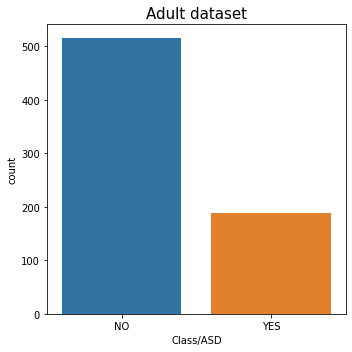

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(ch['Class/ASD'])
ax.set_title("Adult dataset",fontsize = 15)
fig.tight_layout()

In [ ]:
ch.isnull().sum()

id                  0
A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64

In [ ]:
ch[['age', 'ethnicity','relation']] = ch[['age', 'ethnicity','relation']].fillna(ch[['age', 'ethnicity','relation']].mean)

In [ ]:
ch.isnull().sum()

id                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [ ]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               704 non-null    int64 
 1   A1_Score         704 non-null    int64 
 2   A2_Score         704 non-null    int64 
 3   A3_Score         704 non-null    int64 
 4   A4_Score         704 non-null    int64 
 5   A5_Score         704 non-null    int64 
 6   A6_Score         704 non-null    int64 
 7   A7_Score         704 non-null    int64 
 8   A8_Score         704 non-null    int64 
 9   A9_Score         704 non-null    int64 
 10  A10_Score        704 non-null    int64 
 11  age              704 non-null    object
 12  gender           704 non-null    object
 13  ethnicity        704 non-null    object
 14  jundice          704 non-null    object
 15  austim           704 non-null    object
 16  contry_of_res    704 non-null    object
 17  used_app_before  704 non-null    ob

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
le = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
ch['Class/ASD']= le.fit_transform(ch['Class/ASD'])

ch['Class/ASD'].unique()

array([0, 1])

In [ ]:
ch['age'] = ch['age'].astype(str)
ch['age']= le.fit_transform(ch['age'])

In [ ]:
ch['gender']= le.fit_transform(ch['gender'])

In [ ]:
ch['ethnicity'] = ch['ethnicity'].astype(str)
ch['ethnicity']= le.fit_transform(ch['ethnicity'])

In [ ]:
ch['jundice']= le.fit_transform(ch['jundice'])

In [ ]:

ch['austim']= le.fit_transform(ch['austim'])

In [ ]:
ch['contry_of_res']= le.fit_transform(ch['contry_of_res'])

In [ ]:
ch['used_app_before']= le.fit_transform(ch['used_app_before'])


In [ ]:
ch.drop(columns=['age_desc'],axis = 1,inplace=True)

In [ ]:
ch['relation'] = ch['relation'].astype(str)
ch['relation']= le.fit_transform(ch['relation'])

In [ ]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               704 non-null    int64
 1   A1_Score         704 non-null    int64
 2   A2_Score         704 non-null    int64
 3   A3_Score         704 non-null    int64
 4   A4_Score         704 non-null    int64
 5   A5_Score         704 non-null    int64
 6   A6_Score         704 non-null    int64
 7   A7_Score         704 non-null    int64
 8   A8_Score         704 non-null    int64
 9   A9_Score         704 non-null    int64
 10  A10_Score        704 non-null    int64
 11  age              704 non-null    int64
 12  gender           704 non-null    int64
 13  ethnicity        704 non-null    int64
 14  jundice          704 non-null    int64
 15  austim           704 non-null    int64
 16  contry_of_res    704 non-null    int64
 17  used_app_before  704 non-null    int64
 18  result    

In [ ]:
import scipy.stats as stats

In [ ]:
chz=stats.zscore(ch)
chz

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,-1.729592,0.621150,1.098588,1.089190,1.008559,-0.997163,-0.629941,1.180914,0.735174,-0.692092,...,-0.342364,-1.043562,1.182537,-0.329638,-0.385292,1.034154,-0.131685,0.450051,0.516405,-0.605797
1,-1.724672,0.621150,1.098588,-0.918113,1.008559,-0.997163,-0.629941,-0.846802,0.735174,-0.692092,...,-0.540086,0.958257,-0.328820,-0.329638,2.595431,-1.609511,-0.131685,0.050006,0.516405,-0.605797
2,-1.719751,0.621150,1.098588,-0.918113,1.008559,1.002845,-0.629941,1.180914,0.735174,1.444894,...,-0.243502,0.958257,-0.328820,3.033628,2.595431,0.619462,-0.131685,1.250142,-0.630438,1.650717
3,-1.714830,0.621150,1.098588,-0.918113,1.008559,-0.997163,-0.629941,1.180914,0.735174,-0.692092,...,0.547388,-1.043562,1.182537,-0.329638,2.595431,1.034154,-0.131685,0.450051,0.516405,-0.605797
4,-1.709910,0.621150,-0.910259,-0.918113,-0.991513,-0.997163,-0.629941,-0.846802,0.735174,-0.692092,...,1.140557,-1.043562,-1.336392,-0.329638,-0.385292,-1.142982,-0.131685,-1.150131,-2.350702,-0.605797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,1.709910,-1.609918,1.098588,-0.918113,1.008559,1.002845,-0.629941,1.180914,0.735174,1.444894,...,-0.441225,-1.043562,1.182537,-0.329638,-0.385292,0.360279,-0.131685,0.850097,0.516405,1.650717
700,1.714830,0.621150,-0.910259,-0.918113,-0.991513,-0.997163,-0.629941,-0.846802,0.735174,-0.692092,...,0.448527,0.958257,-0.580713,-0.329638,-0.385292,-0.209923,-0.131685,-0.750085,-0.630438,-0.605797
701,1.719751,0.621150,-0.910259,1.089190,1.008559,1.002845,-0.629941,1.180914,0.735174,-0.692092,...,-0.540086,-1.043562,-1.336392,-0.329638,-0.385292,0.360279,-0.131685,0.850097,-2.350702,1.650717
702,1.724672,0.621150,-0.910259,-0.918113,1.008559,1.002845,-0.629941,1.180914,-1.360221,1.444894,...,0.547388,0.958257,0.678751,-0.329638,-0.385292,0.152933,-0.131685,0.450051,0.516405,-0.605797


In [ ]:
#chz['Class/ASD']=chz['Class/ASD'].astype(int)
chz=chz.astype(int)
chz.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,-1,0,1,1,1,0,0,1,0,0,...,0,-1,1,0,0,1,0,0,0,0
1,-1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,2,-1,0,0,0,0
2,-1,0,1,0,1,1,0,1,0,1,...,0,0,0,3,2,0,0,1,0,1
3,-1,0,1,0,1,0,0,1,0,0,...,0,-1,1,0,2,1,0,0,0,0
4,-1,0,0,0,0,0,0,0,0,0,...,1,-1,-1,0,0,-1,0,-1,-2,0


In [ ]:
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd
#Extracting Independent and dependent Variable
x = chz.drop('Class/ASD', axis=1)
y = chz['Class/ASD']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)


In [ ]:
#DataFrame for Models Accuracy Score
model_df = pd.DataFrame(columns=["Model Name","Accuracy Score"])

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(x_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred= classifier.predict(x_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 94.31818181818183


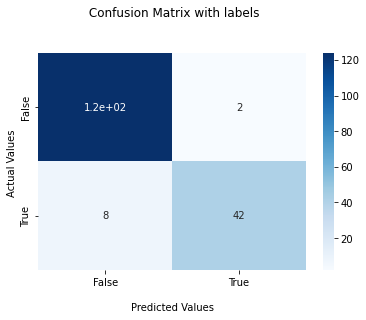

Sensitivity :  0.9841269841269841
Specificity :  0.84


In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
sensitivity1 = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
print('Specificity : ', specificity1)


In [ ]:
new_row = {"Model Name":"SVM", "Accuracy Score":metrics.accuracy_score(y_test, y_pred)*100}
model_df = model_df.append(new_row, ignore_index=True)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=10,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 97.1590909090909


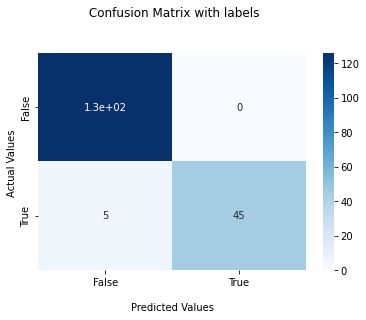

Sensitivity :  1.0
Specificity :  0.9


In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
sensitivity1 = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
print('Specificity : ', specificity1)


In [ ]:
new_row = {"Model Name":"Adaboost Classifier", "Accuracy Score":metrics.accuracy_score(y_test, y_pred)*100}
model_df = model_df.append(new_row, ignore_index=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)


Accuracy: 90.3409090909091


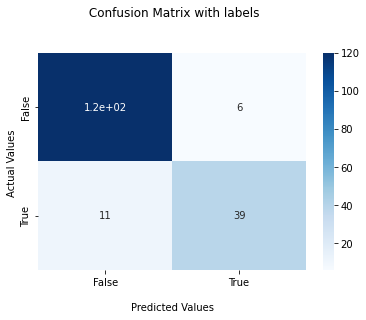

Sensitivity :  0.9523809523809523
Specificity :  0.78


In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
sensitivity1 = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
print('Specificity : ', specificity1)


In [ ]:
new_row = {"Model Name":"Decision Tree Classifier", "Accuracy Score":metrics.accuracy_score(y_test, y_pred)*100}
model_df = model_df.append(new_row, ignore_index=True)

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print(' Accuracy is: %.3f ' % (mean(scores)*100))

 Accuracy is: 95.500 


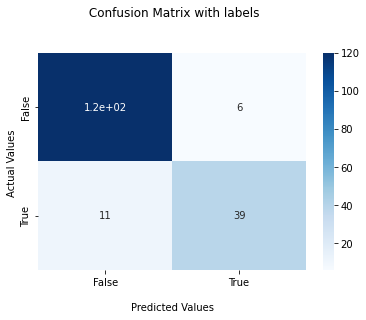

Sensitivity :  0.9523809523809523
Specificity :  0.78


In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
sensitivity1 = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
print('Specificity : ', specificity1)


In [ ]:
new_row = {"Model Name":"Linear Discriminant Analysis", "Accuracy Score":metrics.accuracy_score(y_test, y_pred)*100}
model_df = model_df.append(new_row, ignore_index=True)

In [ ]:
import numpy as np

In [ ]:
seed=7
np.random.seed(seed)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=3,
                             max_depth=2,
                             random_state=seed)

In [ ]:
rfc.fit(x_train, y_train)
# Predict the test set labels
y_pred = rfc.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)


Accuracy: 92.04545454545455


In [ ]:
new_row = {"Model Name":"Random Forest ", "Accuracy Score":metrics.accuracy_score(y_test, y_pred)*100}
model_df = model_df.append(new_row, ignore_index=True)

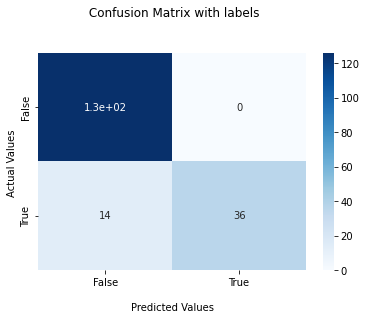

Sensitivity :  1.0
Specificity :  0.72


In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
sensitivity1 = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
print('Specificity : ', specificity1)

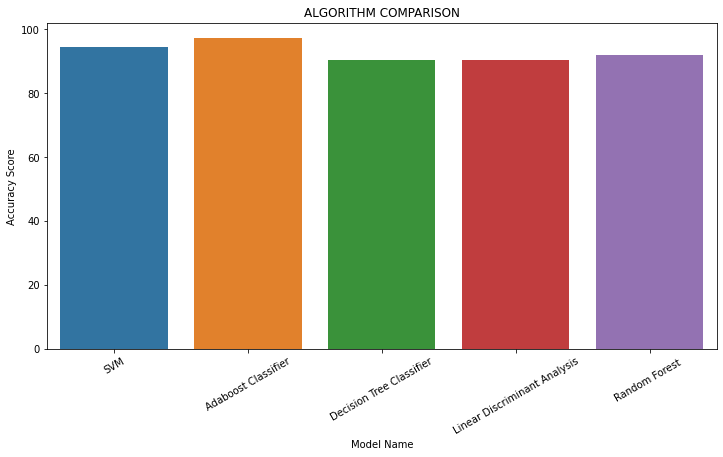

In [ ]:
plt.figure(figsize=(12,6))
plt.title("ALGORITHM COMPARISON")
sns.barplot(x=model_df["Model Name"], y=model_df["Accuracy Score"])
plt.xticks(rotation=30)
plt.show()